In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pre_covid_filename = 'pre_covid_data(1).csv'
covid_filename = 'covid_data(1).csv'

# Read the CSV files from the current working directory, skipping problematic lines
pre_covid_df = pd.read_csv(pre_covid_filename)
covid_df = pd.read_csv(covid_filename)

# Extract and count the occurrences of each genre in both datasets
pre_covid_genres = pre_covid_df['Genres'].value_counts()
covid_genres = covid_df['Genres'].value_counts()

# Normalize the counts to compare the relative usage
pre_covid_genres_normalized = pre_covid_genres / pre_covid_genres.sum()
covid_genres_normalized = covid_genres / covid_genres.sum()

# Combine the normalized counts into a single dataframe
genre_comparison = pd.DataFrame({
    'Pre-COVID': pre_covid_genres_normalized,
    'COVID': covid_genres_normalized
}).fillna(0)

# Calculate the difference in proportions between pre-COVID and COVID periods
genre_difference = genre_comparison['COVID'] - genre_comparison['Pre-COVID']

sns.set_style("whitegrid")



# Analyze Sentiment Changes Pre- and Post-COVID-19

In [64]:
# Calculate sentiment distributions
pre_covid_sentiment = pre_covid_df['sentiment'].value_counts(normalize=True) * 100
post_covid_sentiment = covid_df['sentiment'].value_counts(normalize=True) * 100

print("Pre-COVID Sentiment Distribution:")
print(pre_covid_sentiment)
print("\nPost-COVID Sentiment Distribution:")
print(post_covid_sentiment)

Pre-COVID Sentiment Distribution:
sentiment
positive    65.080264
negative    26.066100
neutral      8.853636
Name: proportion, dtype: float64

Post-COVID Sentiment Distribution:
sentiment
positive    61.041635
negative    24.378527
neutral     14.579838
Name: proportion, dtype: float64


# Visualize the Sentiment Changes

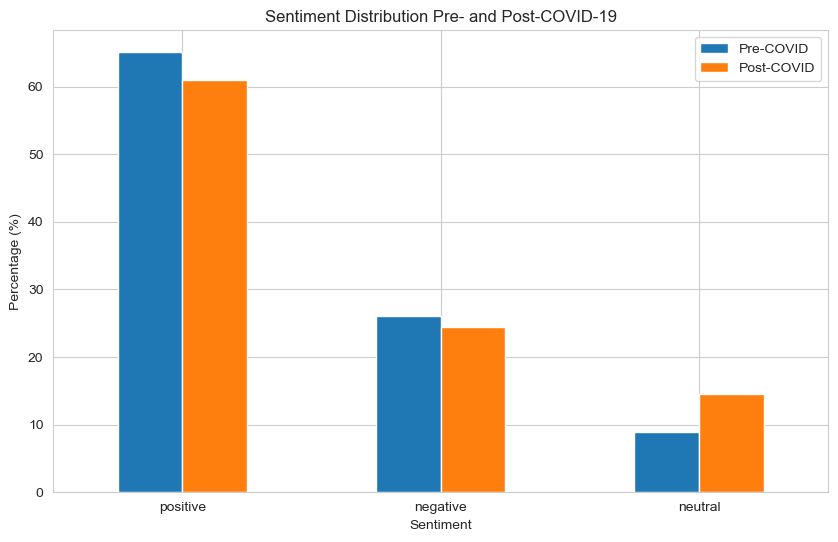

In [67]:
#Bar Chart
import matplotlib.pyplot as plt

# Combine data for plotting
sentiment_df = pd.DataFrame({
    'Pre-COVID': pre_covid_sentiment,
    'Post-COVID': post_covid_sentiment
})

# Bar chart
sentiment_df.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution Pre- and Post-COVID-19')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

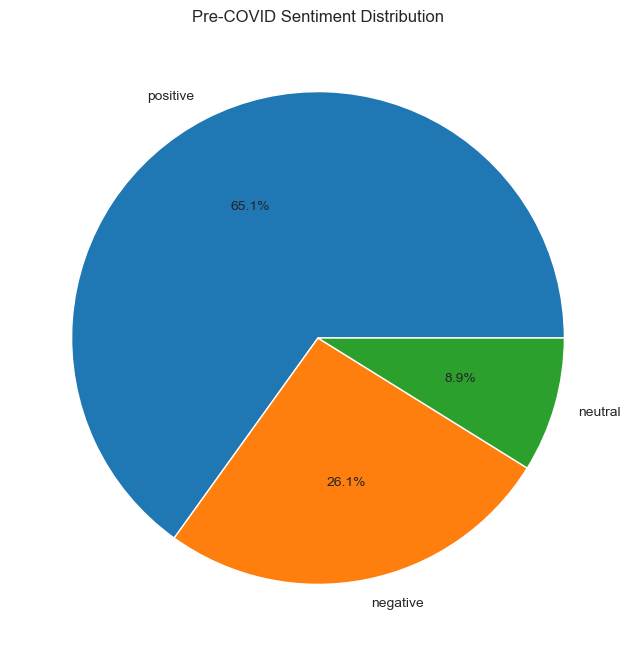

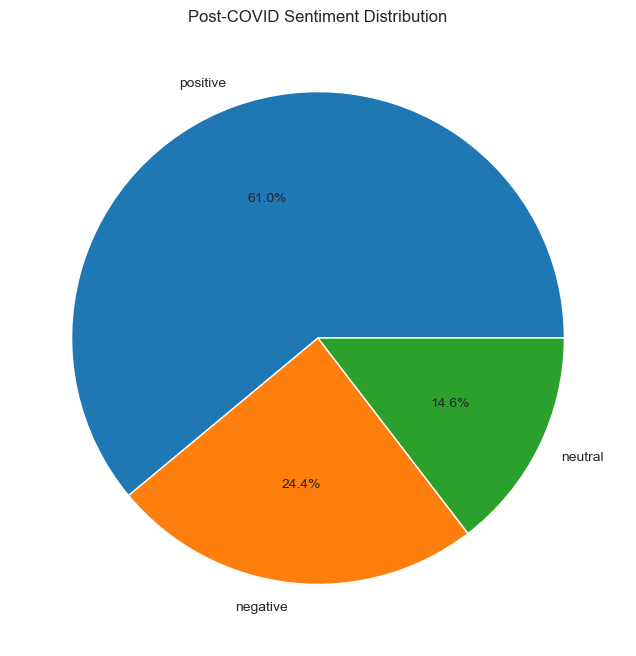

In [69]:
# Pie chart for pre-COVID sentiment
pre_covid_sentiment.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Pre-COVID Sentiment Distribution')
plt.ylabel('')
plt.show()

# Pie chart for post-COVID sentiment
post_covid_sentiment.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Post-COVID Sentiment Distribution')
plt.ylabel('')
plt.show()

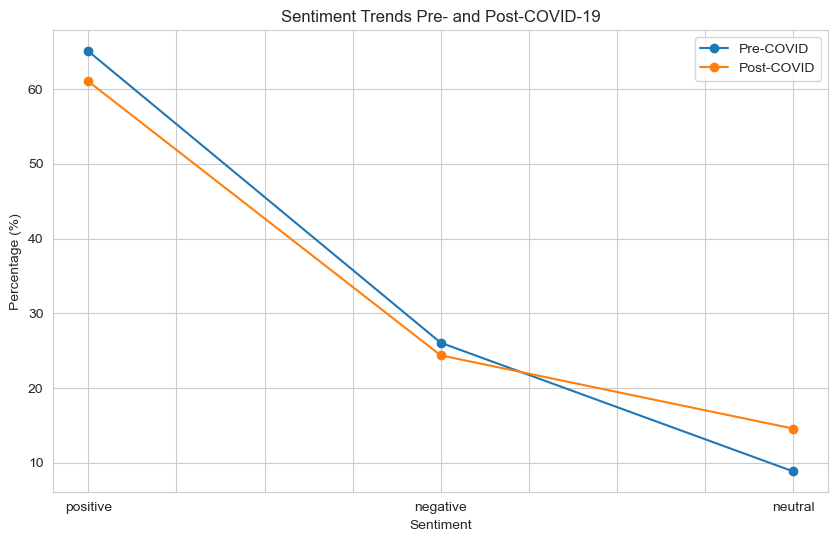

In [70]:
# Line Char
# Line chart to compare sentiments
sentiment_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sentiment Trends Pre- and Post-COVID-19')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot 1: Bar chart of genre usage in the pre-COVID period


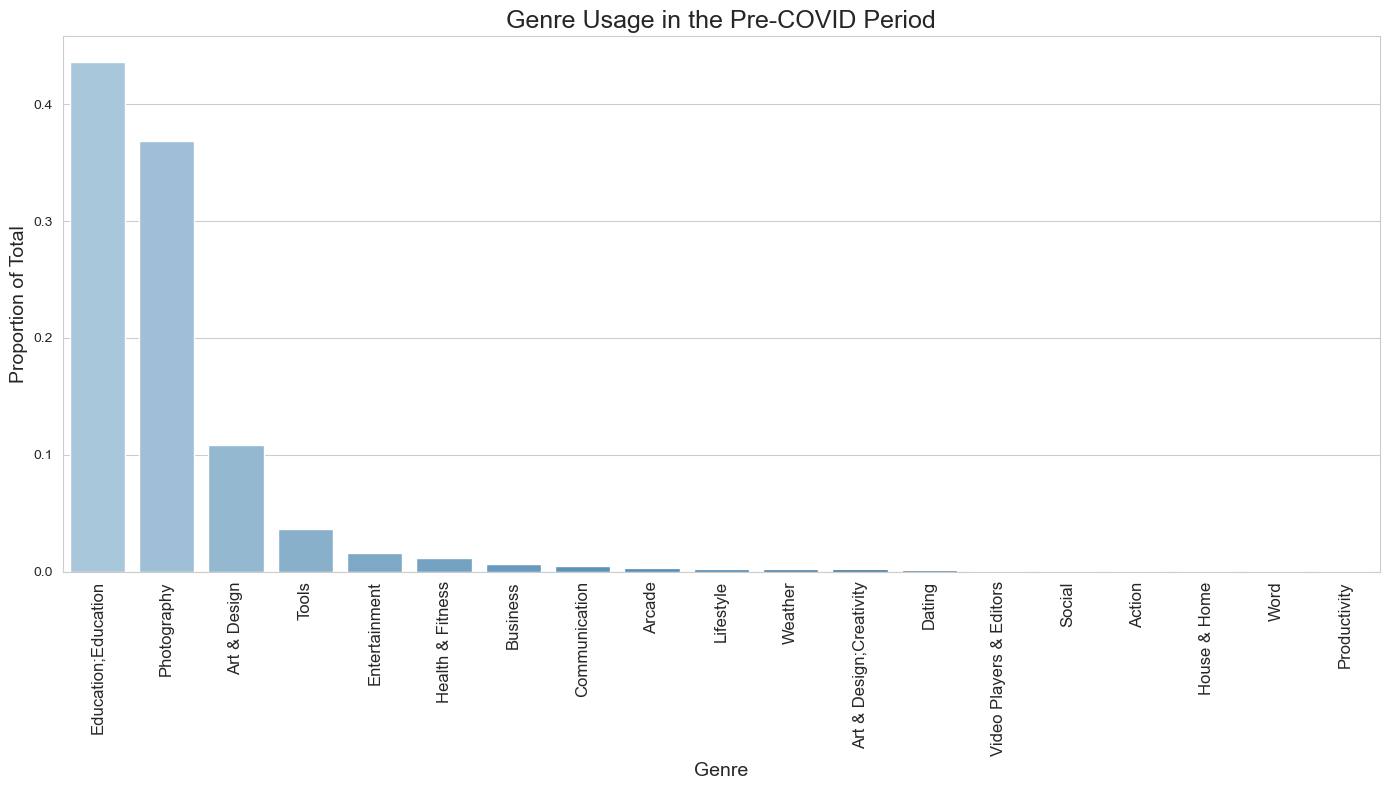

In [11]:
plt.figure(figsize=(14, 8))
sns.barplot(x=pre_covid_genres_normalized.index, y=pre_covid_genres_normalized.values, palette="Blues_d")
plt.title('Genre Usage in the Pre-COVID Period', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Proportion of Total', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

# Plot 2: Bar chart of genre usage during the COVID period


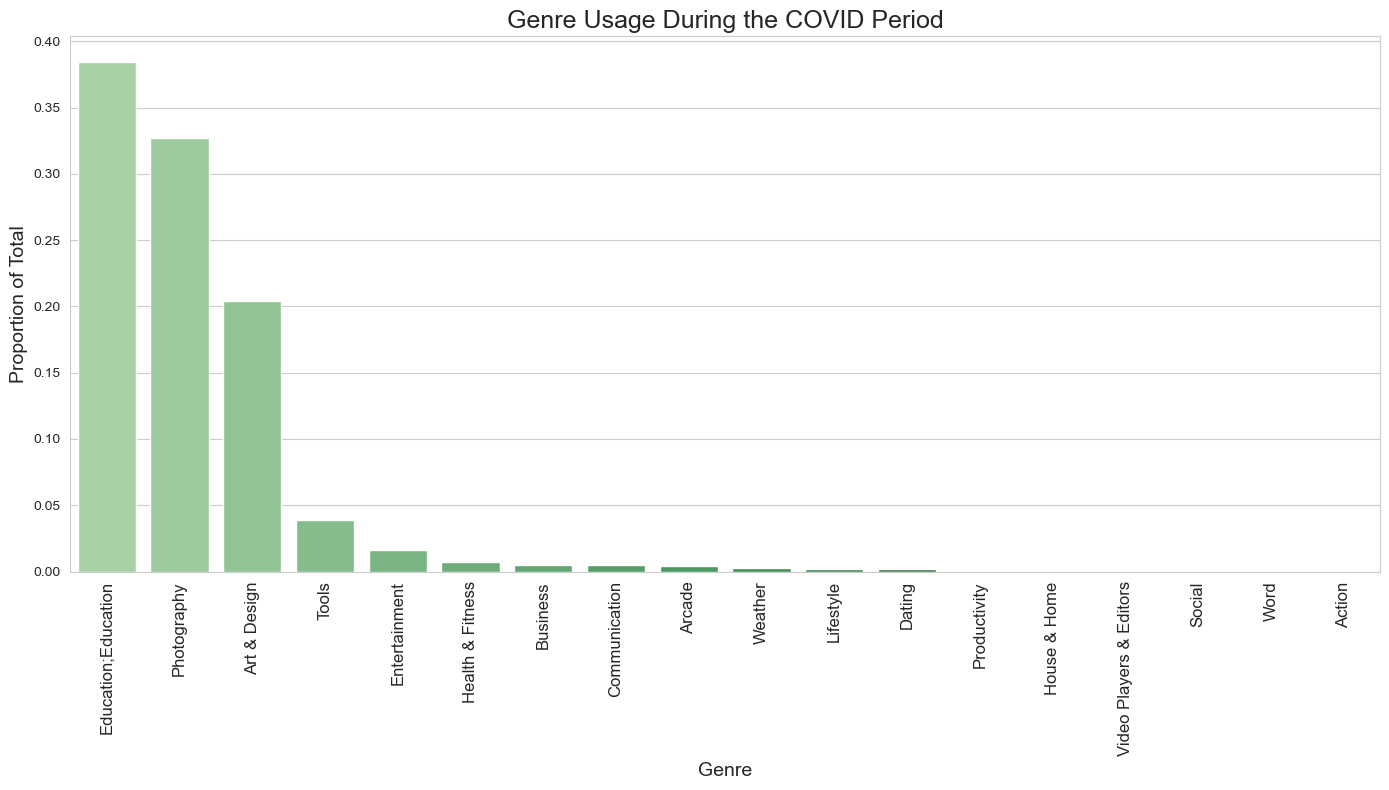

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(x=covid_genres_normalized.index, y=covid_genres_normalized.values, palette="Greens_d")
plt.title('Genre Usage During the COVID Period', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Proportion of Total', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

# Plot 3: Side-by-side bar chart comparing genre usage before and during COVID


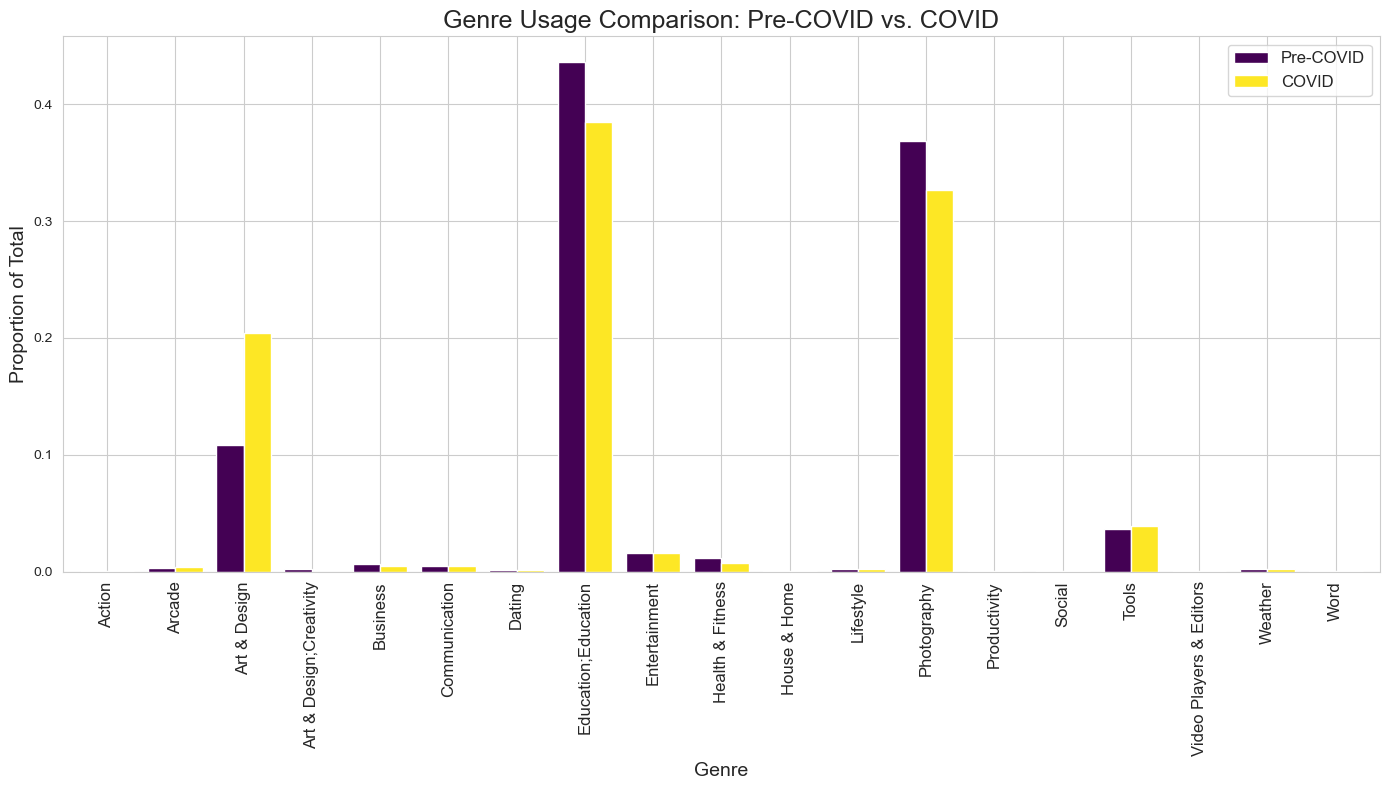

In [13]:
genre_comparison.plot(kind='bar', figsize=(14, 8), width=0.8, colormap="viridis")
plt.title('Genre Usage Comparison: Pre-COVID vs. COVID', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Proportion of Total', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

# Heatmap


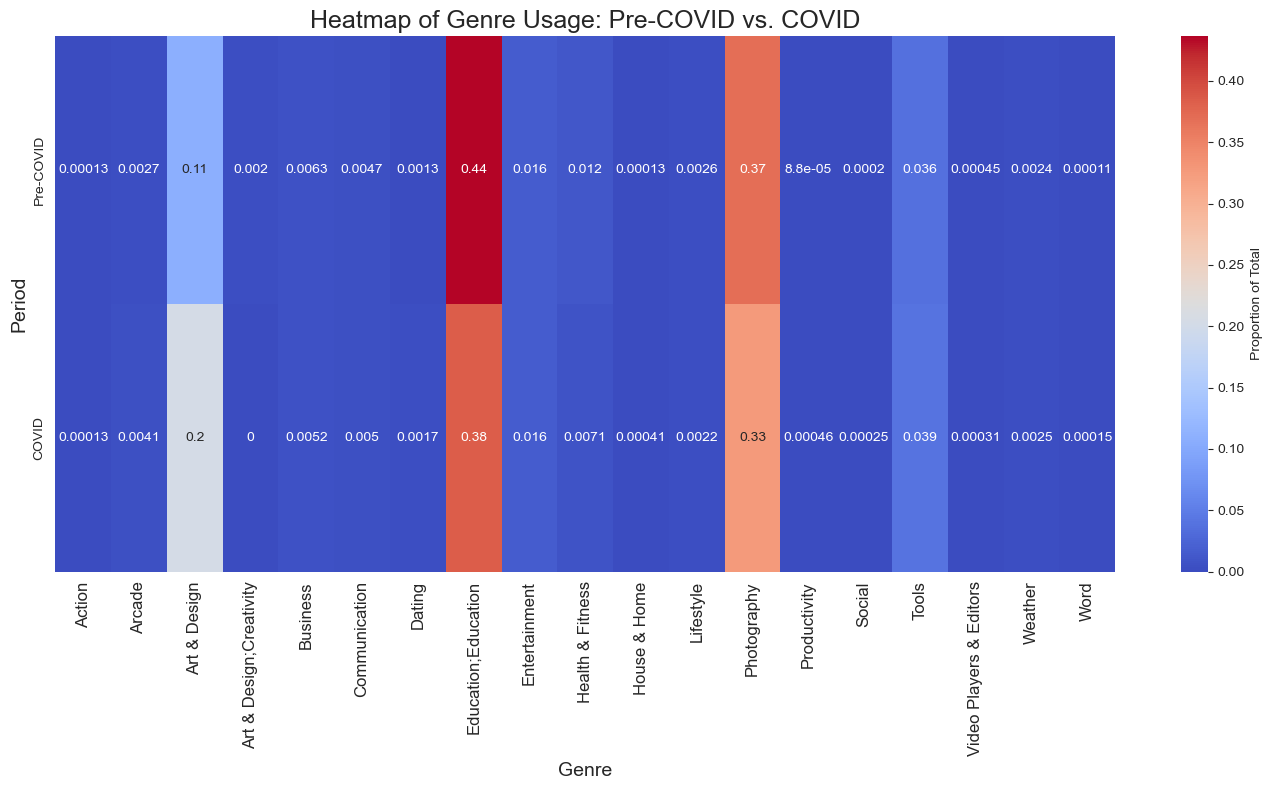

In [41]:
plt.figure(figsize=(14, 8))
sns.heatmap(genre_comparison.T, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of Total'})
plt.title('Heatmap of Genre Usage: Pre-COVID vs. COVID', fontsize=18)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Period', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


# Sentiment distribution for pre-COVID and COVID periods for all categories

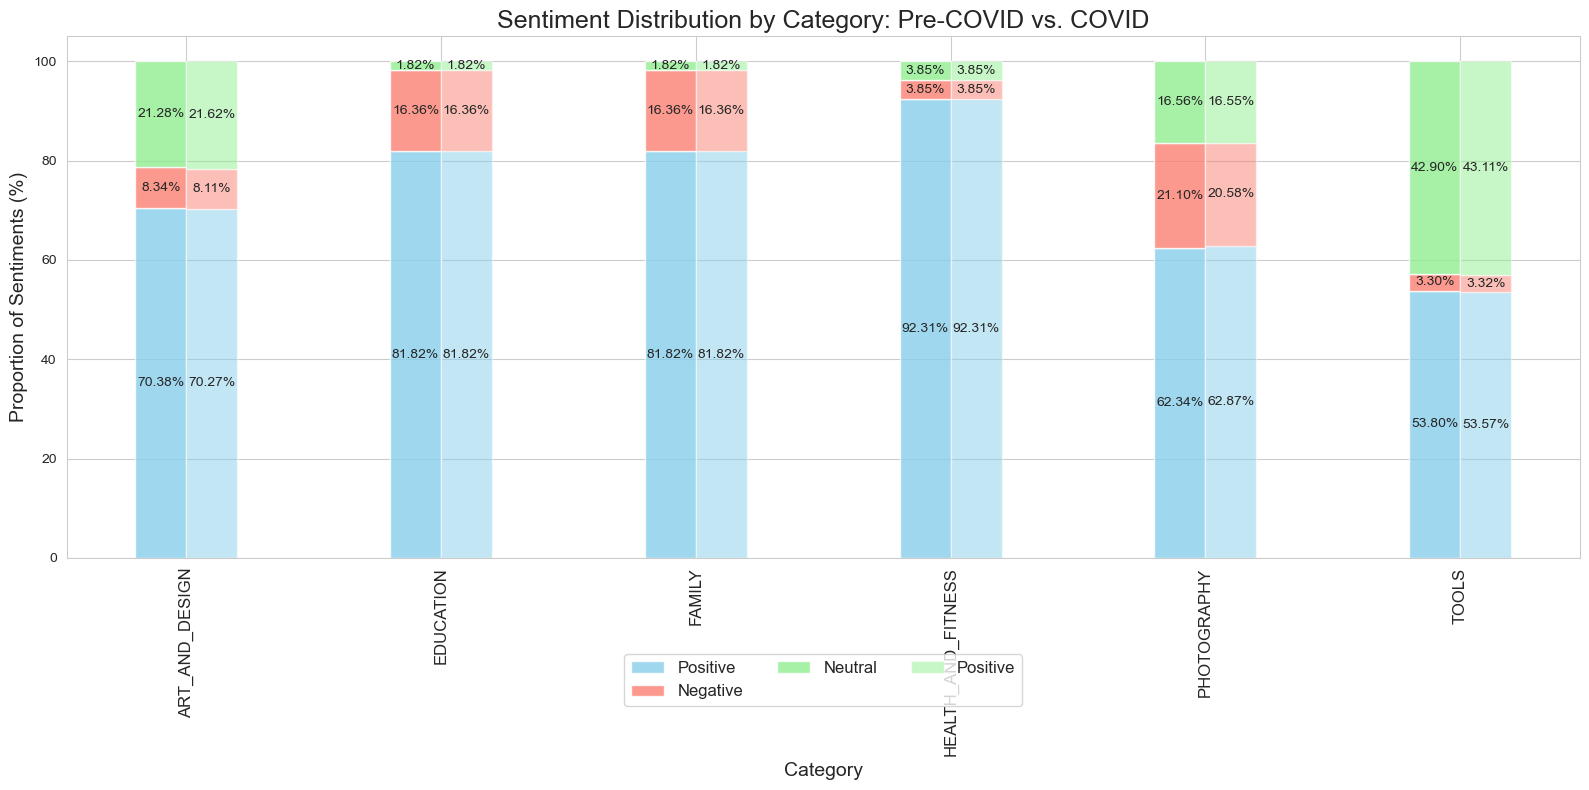

In [61]:
# Calculate sentiment distribution for pre-COVID and COVID periods for all categories
pre_covid_sentiment_counts = pre_covid_df.groupby('Category')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
covid_sentiment_counts = covid_df.groupby('Category')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the proportions of each sentiment category relative to the total number of sentiments
pre_covid_total_counts = pre_covid_sentiment_counts.sum(axis=1)
covid_total_counts = covid_sentiment_counts.sum(axis=1)

pre_covid_positive_ratio = (pre_covid_sentiment_counts['Positive'] / pre_covid_total_counts) * 100
covid_positive_ratio = (covid_sentiment_counts['Positive'] / covid_total_counts) * 100

pre_covid_negative_ratio = (pre_covid_sentiment_counts['Negative'] / pre_covid_total_counts) * 100
covid_negative_ratio = (covid_sentiment_counts['Negative'] / covid_total_counts) * 100

pre_covid_neutral_ratio = (pre_covid_sentiment_counts['Neutral'] / pre_covid_total_counts) * 100
covid_neutral_ratio = (covid_sentiment_counts['Neutral'] / covid_total_counts) * 100

# Plotting
sns.set_style("whitegrid")

# Set up the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Bar width
bar_width = 0.2
index = pre_covid_positive_ratio.index

# Positions for the bars
pre_covid_positions = range(len(index))
covid_positions = [pos + bar_width for pos in pre_covid_positions]

# Plotting the bars for positive sentiment
ax.bar(pre_covid_positions, pre_covid_positive_ratio, bar_width, label='Pre-COVID: Positive', color='skyblue', alpha=0.8)
ax.bar(covid_positions, covid_positive_ratio, bar_width, color='skyblue', alpha=0.5)

# Plotting the bars for negative sentiment
ax.bar(pre_covid_positions, pre_covid_negative_ratio, bar_width, label='Pre-COVID: Negative', bottom=pre_covid_positive_ratio, color='salmon', alpha=0.8)
ax.bar(covid_positions, covid_negative_ratio, bar_width, bottom=covid_positive_ratio, color='salmon', alpha=0.5)

# Plotting the bars for neutral sentiment
ax.bar(pre_covid_positions, pre_covid_neutral_ratio, bar_width, label='Pre-COVID: Neutral', bottom=pre_covid_positive_ratio+pre_covid_negative_ratio, color='lightgreen', alpha=0.8)
ax.bar(covid_positions, covid_neutral_ratio, bar_width, label='COVID: Neutral', bottom=covid_positive_ratio+covid_negative_ratio, color='lightgreen', alpha=0.5)

# Add text labels on top of each bar
for i, pos in enumerate(pre_covid_positions):
    ax.text(pos, pre_covid_positive_ratio[i] / 2, f"{pre_covid_positive_ratio[i]:.2f}%", ha='center', va='center', fontsize=10)
    ax.text(pos, pre_covid_positive_ratio[i] + pre_covid_negative_ratio[i] / 2, f"{pre_covid_negative_ratio[i]:.2f}%", ha='center', va='center', fontsize=10)
    ax.text(pos, pre_covid_positive_ratio[i] + pre_covid_negative_ratio[i] + pre_covid_neutral_ratio[i] / 2, f"{pre_covid_neutral_ratio[i]:.2f}%", ha='center', va='center', fontsize=10)

for i, pos in enumerate(covid_positions):
    ax.text(pos, covid_positive_ratio[i] / 2, f"{covid_positive_ratio[i]:.2f}%", ha='center', va='center', fontsize=10)
    ax.text(pos, covid_positive_ratio[i] + covid_negative_ratio[i] / 2, f"{covid_negative_ratio[i]:.2f}%", ha='center', va='center', fontsize=10)
    ax.text(pos, covid_positive_ratio[i] + covid_negative_ratio[i] + covid_neutral_ratio[i] / 2, f"{covid_neutral_ratio[i]:.2f}%", ha='center', va='center', fontsize=10)

# Customize the plot
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Proportion of Sentiments (%)', fontsize=14)
ax.set_title('Sentiment Distribution by Category: Pre-COVID vs. COVID', fontsize=18)
ax.set_xticks([pos + bar_width / 2 for pos in range(len(index))])
ax.set_xticklabels(index, rotation=90, fontsize=12)

# Create legend
legend_handles, legend_labels = ax.get_legend_handles_labels()
legend_labels = ['Positive', 'Negative', 'Neutral'] * 2  # Repeat the labels for both periods
ax.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=12)

plt.tight_layout()
plt.show()